<a href="https://colab.research.google.com/github/JoJuML/practica_charts_pd/blob/main/beer's_factory_(practica_charts_pd).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***THIS COLAB IS AN ADAPTACION OF GIT: "practica_charts_pd"***

here both modules come from the file "app" and "images" is the file where the charts are stored, but on this colab is deleted

**this is the achive store.py within the file "app"**

In [39]:
import requests as rq

def get_beer():
    get = rq.get('https://random-data-api.com/api/beer/random_beer?size=100&is_json=true')

    texto = get.json()
    for i in texto:
        i['blg'] = float(i['blg'].replace('°Blg','')) # the Balling scale corresponding to the percentage of sugars in the solution
        i['alcohol'] = float(i['alcohol'].replace('%','')) # level of alcohol in porcentage
        i['ibu'] = int(i['ibu'].replace(' IBU','')) #“International Bittering Unit,”
        i['id'] = str(i['id'])
    return texto

**this is the achive charts.py within the file "app"**

In [35]:
import matplotlib.pyplot as plt

def chart_boxplot(x):
    fig, axe = plt.subplots()
    plt.title('beer_boxplot\n International Bittering Unit')
    axe.boxplot(x,notch=False)
    plt.tight_layout()
    plt.show() #originaly was: plt.savefig('images/beerboxplot.png')
    plt.close

def chart_scatter(x,y):
    fig, axe = plt.subplots()
    axe.scatter(x,y)
    plt.xlabel("alcohol")
    plt.ylabel("ibu (International Bittering Unit)")
    plt.tight_layout()
    plt.show() #originaly was: plt.savefig('images/beerst.png')
    plt.close

**this is the achive main.py**

STATICS OF BEER´S PRODUCCTION
              ibu     alcohol         blg
count  100.000000  100.000000  100.000000
mean    57.230000    6.380000   12.970000
std     27.777927    2.340336    4.727515
min     10.000000    2.400000    5.000000
25%     31.000000    4.175000    8.475000
50%     56.500000    6.400000   13.650000
75%     83.250000    8.500000   17.250000
max    100.000000    9.900000   19.900000
MAXIM KIND OF BEER
id                                         9964
uid        f6c815a9-a8e1-4b07-9580-3c3bad2e003d
brand                                  Tsingtao
name              Weihenstephaner Hefeweissbier
style                            Wood-aged Beer
hop                                  Yakima Gol
yeast             5526 - Brettanomyces lambicus
malts                                 Wheat mal
ibu                                         100
alcohol                                     9.9
blg                                        19.9
dtype: object
MINIM KIND OF BEER
id          

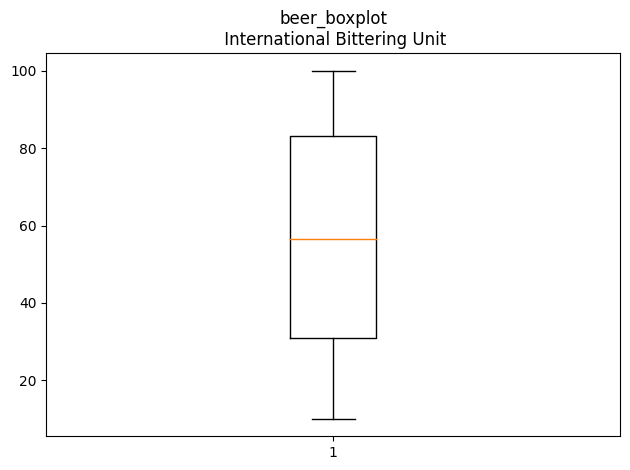

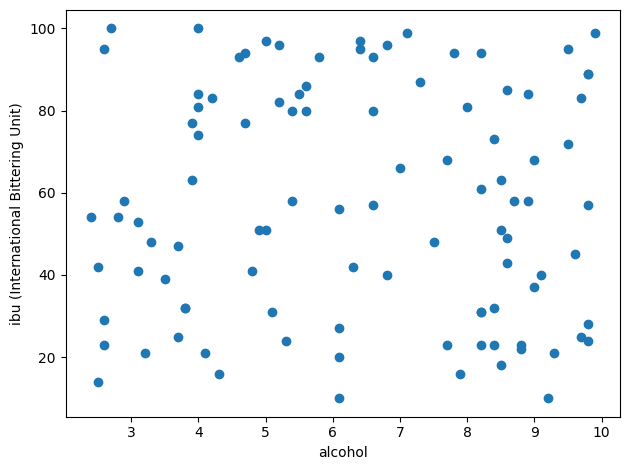

In [40]:
import pandas as pd
'''
for adapt to colab is better to take modules without any other file
import app.store as store
from app import charts
'''

def transform():
    id = []
    uid = []
    brand = []
    name = []
    style = []
    hop = []
    yeast = []
    malts = []
    ibu = []
    alcohol = []
    blg = []

    for i in get_beer(): # originaly was: store.get_beer()
        id.append(i['id'])
        uid.append(i['uid'])
        brand.append(i['brand'])
        name.append(i['name'])
        style.append(i['style'])
        hop.append(i['hop'])
        yeast.append(i['yeast'])
        malts.append(i['malts'])
        ibu.append(i['ibu'])
        alcohol.append(i['alcohol'])
        blg.append(i['blg'])

    dic = { 'id':id , 'uid':uid , 'brand':brand ,'name':name, 'style':style, 'hop':hop, 'yeast':yeast,
            'malts':malts, 'ibu':ibu, 'alcohol':alcohol, 'blg':blg}
    new = pd.DataFrame(dic)
    return new

def main():
    df = transform()
    print('STATICS OF BEER´S PRODUCCTION')
    print(df.describe())
    print('MAXIM KIND OF BEER')
    print(df.max())
    print('MINIM KIND OF BEER')
    print(df.min())

    chart_boxplot(df['ibu'].values) #originaly was: charts.chart_boxplot(----)

    chart_scatter(df['alcohol'].values,df['ibu'].values) #originaly was: charts.chart_scatter(----)

if __name__=='__main__':
  main()